# MHKit Upcrossing Analysis Example

The following shows an example of using the upcrossing functionality in the [MHKiT QC module](https://mhkit-software.github.io/MHKiT/mhkit-python/api.qc.html).

This example performs an upcrossing analysis on a surface elevation trace to plot some quantities of interest. Such an upcrossing analysis could be applied to any time domain signal, such as a device response.

In [1]:
from mhkit.wave.resource import jonswap_spectrum, surface_elevation
from mhkit.utils import upcrossing, peaks, troughs, heights, periods
import numpy as np
import matplotlib.pyplot as plt

## Compute the surface elevation

In [2]:
# Peak period and significant wave height
Tp = 10   # s
Hs = 2.5  # m
gamma = 3.3

# Create frequency vector using a return period of 1hr
Tr = 3600  # s
df = 1.0 / Tr  # Hz
f = np.arange(0, 1, df)
 
# Calculate spectrum
spec = jonswap_spectrum(f, Tp, Hs, gamma)

# Calculate surface elevation
fs = 10.0 # Hz
t = np.arange(0, Tr, 1 / fs)

eta = surface_elevation(spec, t)

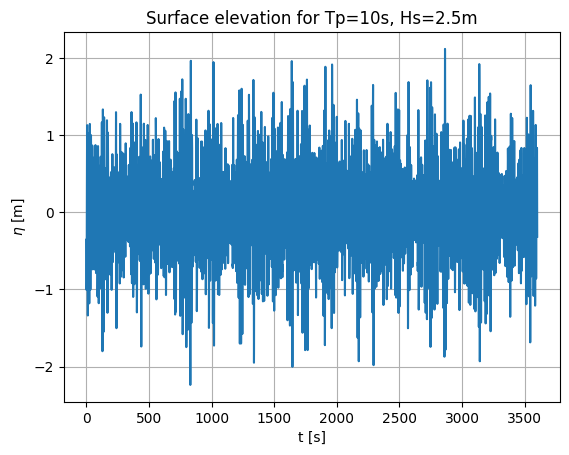

In [3]:
plt.figure()
plt.plot(t, eta)
plt.xlabel('t [s]')
plt.ylabel('$\eta$ [m]')
plt.title(f"Surface elevation for Tp={Tp}s, Hs={Hs}m")
plt.grid()

## Plot the individual wave heights and periods

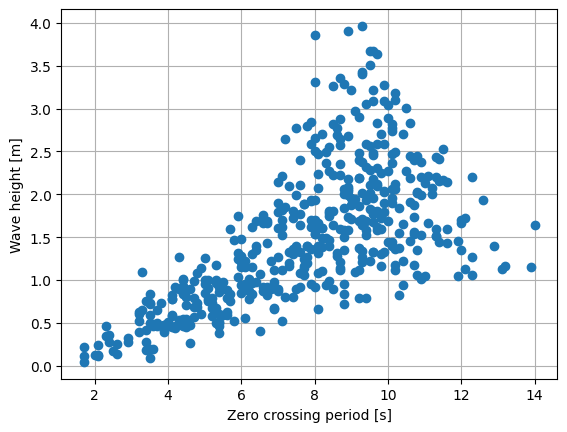

In [4]:
heights = heights(t, eta.values.squeeze())
periods = periods(t, eta.values.squeeze())

plt.figure()
plt.plot(periods, heights, 'o')
plt.xlabel('Zero crossing period [s]')
plt.ylabel('Wave height [m]')
plt.grid()

## Plot the crest probability of exceedance distribution

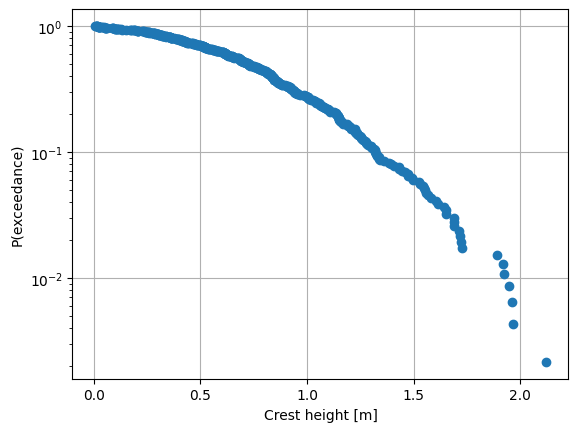

In [23]:
crests = peaks(t, eta.values.squeeze())
crests_sorted = np.sort(crests)

N = crests_sorted.size

# Exceedance probability. Crests are in ascending order
# meaning the first element has P(exceedance) = 1, and
# the final element has P(exceedance) = 1 / N
Q = np.arange(N, 0, -1) / N

plt.figure()
plt.semilogy(crests_sorted, Q, 'o')
plt.xlabel('Crest height [m]')
plt.ylabel('P(exceedance)')
plt.grid()
plt.show()